In [1]:
import sys
sys.path.append(sys.path[0].replace('/docs',''))
from group_decomposition import fragfunctions as ff
from group_decomposition import utils
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem import BRICS
from rdkit.Chem import AllChem #used for 3d coordinates
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork # scaffolding
from rdkit import RDPaths
from rdkit.Chem.Draw import rdMolDraw2D

# Identifying connected fragments

This package has utilities for fragmenting a molecule, or list of molecules, starting from their SMILEs code. So to start, we'll take a random molecule from the Retrievium database by it's SMILEs code:


c1ccc(c(c1)/C=C/C(=O)NNC(=O)NCCCn2cc[nH+]c2)OC(F)(F)F

Below, we create a molecule object to use to view it with RDKit functionality

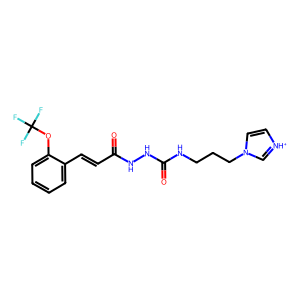

In [2]:
smile1='c1ccc(c(c1)/C=C/C(=O)NNC(=O)NCCCn2cc[nH+]c2)OC(F)(F)F'
mol1 = Chem.MolFromSmiles(smile1)
Draw.MolToImage(mol1)

The functionality provided here will break the molecule as follows:
* into the two rings
* the OCF3 side chain
* the connected non-sp3 carbons in the linker between the rings
* the Ertl functional group(non-carbon atoms and double bonded carbons)


Any additional linkers and any additional peripherals would also be found, and further dissected into alkyl chains and Ertl functional groups

We can find the connected fragments as follows:

[13:50:32] Running LargestFragmentChooser
[13:50:32] Fragment: O=C(/C=C/c1ccccc1OC(F)(F)F)NNC(=O)NCCCn1cc[nH+]c1
[13:50:32] New largest fragment: O=C(/C=C/c1ccccc1OC(F)(F)F)NNC(=O)NCCCn1cc[nH+]c1 (47)


,Smiles,Molecule,numAttachments
0,[3*]O[5*],,2
1,[1*]/C=C/C(=O)NNC(=O)N[4*],,2
2,[2*]CCC[4*],,2
3,[2*]n1cc[nH+]c1,,1
4,[1*]c1ccccc1[3*],,2
5,[5*]C(F)(F)F,,1

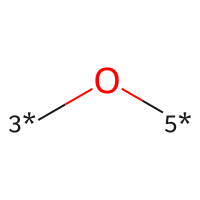
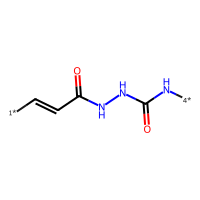
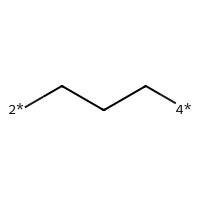
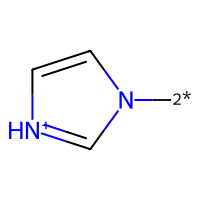
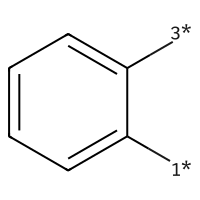
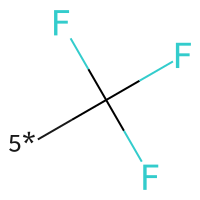

In [3]:
connected_frame = ff.identify_connected_fragments(smile1)
connected_frame

In [4]:
Chem.MolToSmiles(Chem.MolFromSmiles(smile1))

'O=C(/C=C/c1ccccc1OC(F)(F)F)NNC(=O)NCCCn1cc[nH+]c1'

You can also perform the fragmentation starting from a .mol file, optionally including a cml file as well. These are the two files provided for molecules in the Retrievium database. If no cml file is provided, xyz coordinates will be taken from the .mol file instead, which are not the optimized geometry.

To do the fragmentation in this way, we provide a filename instead of a smiles as the first argument, set input_type to 'molfile' and pass cml_file the cml file name if being used. The output frame is quite similar, but here we also include xyz coordinates of the atoms in the fragment, and the atom indices of atoms in the fragment corresponding to their number in the molecule

In [5]:
connected_frame_from_mol = ff.identify_connected_fragments('mol.txt',input_type='molfile',cml_file='cml.txt')

[13:50:32] Running LargestFragmentChooser
[13:50:32] Fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15]
[13:50:32] New largest fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15] (28)


,Smiles,Molecule,numAttachments,Atoms,xyz
0,[4*]N1CC1,,1,"[10, 11, 12, 25, 26, 27, 28]",N 2.1614951848 0.0987681757 -0.3856958646\n...
1,[1*][C@@]1([2*])[C@H]([4*])C[C@@H]1[3*],,4,"[2, 6, 8, 9, 19, 22, 23, 24]",C -0.3923738854 0.0967594812 -0.1272617014\...
2,[2*]NC=N,,1,"[3, 4, 5, 16, 17, 18]",N -0.9739272989 1.2613052532 0.5309204078\n...
3,[1*]C,,1,"[1, 13, 14, 15]",C -0.4535358949 0.2234540606 -1.6469131302\...
4,[3*]N,,1,"[7, 20, 21]",N -1.7727338429 -2.0346443043 -0.4117740679...

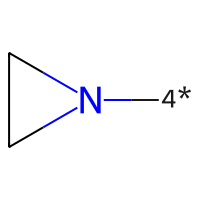
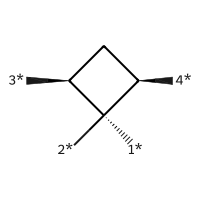
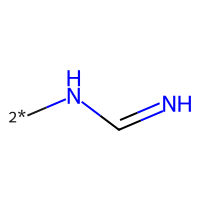
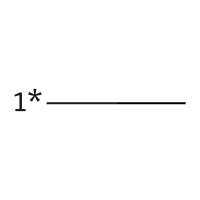
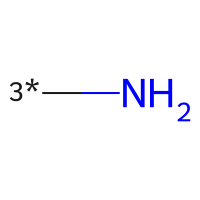

In [6]:
connected_frame_from_mol

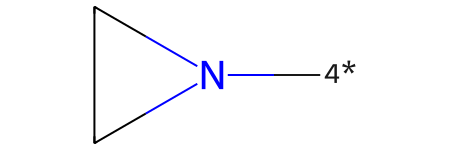

In [10]:
#note that the attachement labels are stored as the isotope (as done by the rdkit FragmentOnBonds functionality, which is how we break bonds)
tm = connected_frame_from_mol['Molecule'][0]
tm


In [11]:
#See that an atom has the isotope of the dummy atom label
for a in tm.GetAtoms():
    print(a.GetIsotope())

4
0
0
0


We can also link these fragments by the dummy atom labels above, as we can see below. Note that rerunning the commands on this notebook may cause an error here - the order of the rows in the frame are randomized. Set the index for the first argument to the row with SMILES '\[2*\]NC=N' and the second to the row with the substituted cyclobutyl

The arguments here are:
    mol_1 the first molecule object to be linked
    mol_2 the second molecule object to be linked
    dl_1 - 'dummy label 1' - the integer label (isotope) of the dummy atom in molecule 1 where the replacement will occur
    dl_2 - as dl_1 but for the second molecule

Note that errors will occur if mol_1 doesn't have an atom with dl_1, and similarly for dl_2 and mol_2

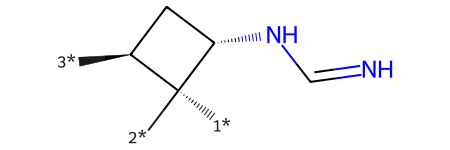

In [9]:
utils.link_molecules(mol_1 = connected_frame_from_mol['Molecule'][2],mol_2=connected_frame_from_mol['Molecule'][1],dl_1=2,dl_2=4)

Note here that each point of attachment has dummy atoms (*, RDKit interprets atomic number as 0), that have a numerical label, starting from 1, up to the number of broken bonds. If you pieced together the molecule, attaching the 1 to the 1, the 2 to the 2, etc., you would end up with the parent molecule.


# Identifying and counting unique groups in a molecule

As another functionality, we can count the number of unique groups in a molecule, and their occurence. To do this, let's look at another molecule

In [ ]:
smile2 = 'Cc1cc(n(n1)CC(=O)Nc2cc(ccc2[N-]S(=O)(=O)c3ccccc3F)Cl)C'
mol2 = Chem.MolFromSmiles(smile2)
Draw.MolToImage(mol2)

Here we can see there are two methyl groups, and two benzene rings. First, we do the same step as before, identifying the connected fragments. Then, we pass that to count_uniques, where first we will use the default setting


In [ ]:
connected_frags_2 = ff.identify_connected_fragments(smile2)
uniqueframe_a = ff.count_uniques(connected_frags_2)
uniqueframe_a

Here, we see the expected results, mostly. We have found two methyl groups, as expected, and all other fragments are unique. Note however, that the two aromatic rings were not matched due to their difference in connectivity. If we wanted those matched, there is the option to drop_attachments, which we will now set to true. Connectivity is not dropped if only one non-placeholder atom is in the fragment. This is to differentiate say a methyl from methylene, or a hydroxyl from an ether.

In [ ]:
uniqueframe_b = ff.count_uniques(connected_frags_2,drop_attachments=True)
uniqueframe_b

Here, we see that we have now counted the aromatic rings as identical. Further note that attachments remain for one of the molecules. For some reason, after dropping the attachments, the rdKit was unable to produce a molecule from the Smiles, so in that error case we maintain attachments.

# On a set of molecules

The last feature presented here is for performing the fragmenting on a set of molecules and counting the unique fragments. As in previous cases, usage is simple, simply pass a list of strings to the function and the output is similar to count_uniques, but over a set of molecules instead of just one. Using the two molecules we've looked at here:

In [ ]:
ff.count_groups_in_set([smile1,smile2])